# CONTEXTE

Cet projet a été realisé au cours de ma certification <strong>IBM Data Science Proffessional Certificate</strong> sur Udemy.
A noter que cet jeu de donnée est artificiel et a été genéré dans le but de la realisation du projet

# Objectives

Analyser les données historiques et fournir aux directeurs d'entreprise d'automobiles nommée <strong>XYZAutomotives</strong> des informations sur la manière dont les ventes ont été affectées pendant les périodes de récession.




# Description des données

Le jeu de données utilisé pour cette mission de visualisation contient des données historiques sur les ventes automobiles, représentant les ventes de voitures et les variables associées durant les périodes de récession et de non-récession.

Le jeu de données comprend les variables suivantes :

<br>1. Date:  La date de l'observation.
<br>2. Recession:  Une variable binaire indiquant une période de récession ; 1 signifie qu'il y avait une récession, 0 signifie une période normale.
<br>3. Automobile_Sales: Le nombre de véhicules vendus durant la période
<br>4. GDP:  La valeur du PIB par habitant en dollars américains (USD)
<br>5. Unemployment_Rate: Le taux de chômage mensuel.
<br>6. Consumer_Confidence: Un indice synthétique représentant la confiance des consommateurs, qui peut influencer les dépenses des consommateurs et l'achat de voitures.
<br>7. Seasonality_Weight:Un facteur représentant l'effet saisonnier sur les ventes automobiles durant la période.
<br>8. Price: Le prix moyen des véhicules durant la période.
<br>9. Advertising_Expenditure: Les dépenses publicitaires de l'entreprise.
<br>10.Vehicle_Type:Le type de véhicules vendus; Supperminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: La mesure de la concurrence sur le marché, comme le nombre de concurrents ou la part de marché des principaux fabricants.
<br>12.Month: Le mois de l'observation, extrait de la variable Date.
<br>13.Year: L'année de l'observation, extraite de la variable Date.
<br>

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

## Importation des librairies necessaire

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données


In [2]:
import requests
import io
import pandas as pd

# URL du fichier CSV 
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Chargement les données
response = requests.get(URL)

# Verifier que les données ont bien été chargé
response.raise_for_status()

# convertir les données en texte
csv_content = io.StringIO(response.text)

# Convertion en dataframe
df = pd.read_csv(csv_content)

# Confirmation de lq lecture  des données
print('Données téléchargée et lue en dataframe')


Données téléchargée et lue en dataframe


## Analyse Exploratoire

In [3]:
# Jetons un coup d'oeuil sur les donneés en utilisant df.head() qui affiche les 05 premieres ligne par defaut
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [4]:
df.columns # affiche le nom des differents colonnes de notre dataframe 

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [5]:
# vérifions les types des colonnes 
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

on as 4 variables cathégoriques et 11 variables numériques dans le dataframe

In [6]:
df.info() #pour avoir plus d'information sur nos données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

Toutes les colonnes du dataframe on 528 ligne non nulle , ce qui signifie qu'on as pas de valeur manquante 

In [7]:
df.describe() #donne les statistique telles la median , l'ecart type , le max , le min etc des colonnes du dataframe

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


Génial division nos données en fonction de la periode de recession et récalculons ces statistiques 

In [8]:
recession=df[df["Recession"]==1]
non_re=df[df["Recession"]==0]
print(f"PERIODE DE RECESSION:")
recession.describe()

PERIODE DE RECESSION:


,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,113.000000,113.0,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,1994.132743,1.0,100.971504,0.373894,24419.324735,3008.053097,6.017699,37.711681,-0.205907,4.137168,648.516814
std,11.518234,0.0,10.047652,0.311011,5034.547760,1173.008235,1.990972,14.105234,0.751458,0.986081,112.660803
min,1980.000000,1.0,79.120000,0.000000,8793.663000,1009.000000,3.000000,15.569000,-2.763376,2.600000,102.000000
25%,1982.000000,1.0,94.200000,0.070000,20459.880000,1938.000000,4.000000,26.602000,-0.459719,3.200000,597.100000
50%,1991.000000,1.0,100.360000,0.250000,23871.118000,2994.000000,6.000000,37.152000,-0.027141,4.100000,669.400000
75%,2002.000000,1.0,107.480000,0.500000,27483.571000,3972.000000,8.000000,50.169000,0.378527,5.000000,724.200000
max,2020.000000,1.0,123.030000,1.000000,35952.278000,4974.000000,9.000000,62.584000,0.716124,6.000000,783.900000


In [9]:
print(f"PERIODE NORMALE:")
non_re.describe()

PERIODE NORMALE:


,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,415.000000,415.0,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,2003.506024,0.0,101.186096,0.630771,25113.571224,3083.631325,6.077108,40.717111,-0.251829,1.995663,2816.753590
std,12.284641,0.0,10.758160,0.471807,4842.972481,1131.192189,1.964376,16.744062,0.889399,0.589137,1560.118205
min,1983.000000,0.0,73.900000,0.070000,11901.274000,1010.000000,3.000000,12.508000,-4.227601,1.000000,426.500000
25%,1993.000000,0.0,93.935000,0.250000,21614.790500,2114.500000,4.000000,28.212500,-0.586177,1.500000,1623.850000
50%,2004.000000,0.0,100.900000,0.500000,25240.425000,3089.000000,6.000000,40.157000,-0.006598,2.000000,2851.800000
75%,2014.500000,0.0,108.365000,0.875000,28158.869500,4071.000000,8.000000,54.641000,0.396772,2.500000,3879.600000
max,2023.000000,0.0,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,3.000000,21147.000000


---


<strong>REMARQUES:<strong><br>
- le prix moyen des automobiles et les dépense publicitaires  ne varient presques pas peu importe la période 
- Cependant , on enrégistres un nombre de vente 4 fois  plus élévé  en periode normale qu'en periode de Récession 
- On note aussi des variation dans les colonnes telles que le taux de chomage mensuelle(unemployment_rate), le PIB par habitants(GDP) etc 

Representons tous ceci en visuel pour plus de comprehension

### Representation de la fluctuation du nombre de vente des véhicule en periode de recession et normale au cours des années 

In [10]:
#calcul  du nombre de vente des automobile
moy_recession=recession.groupby("Year")["Automobile_Sales"].mean().reset_index() 
moy_non_re=non_re.groupby("Year")["Automobile_Sales"].mean().reset_index()

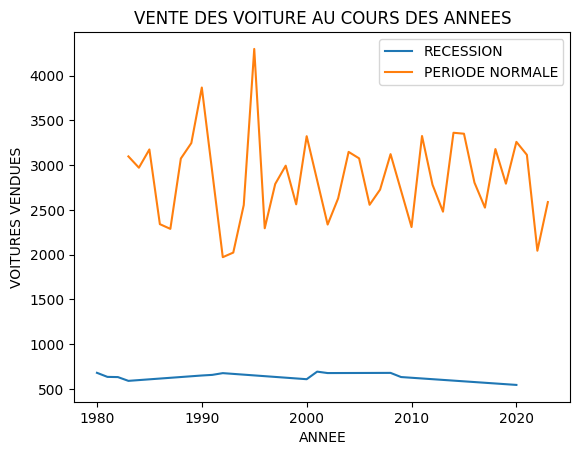

In [ ]:
plt.plot(moy_recession["Year"], moy_recession["Automobile_Sales"], label="RECESSION")
plt.plot(moy_non_re["Year"], moy_non_re["Automobile_Sales"], label="PERIODE NORMALE")
plt.xlabel("ANNEE")
plt.ylabel("VOITURES VENDUES")
plt.legend()
plt.title("VENTE DES VOITURE AU COURS DES ANNEES")

On constates une baisse importante du nombres de ventes des véhicules pendant la période de récession.
vérifions si les baisses sont plus ou moins importante en fonction du type de véhicule 

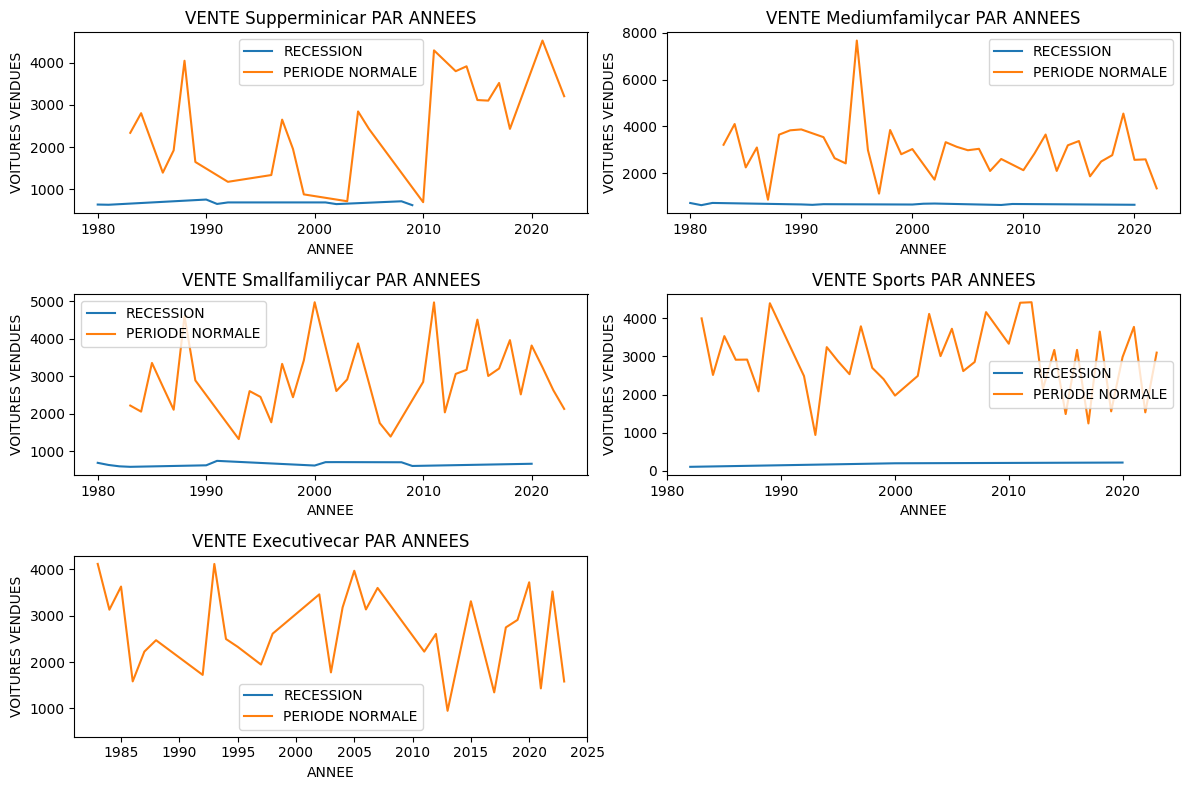

In [28]:
fig=plt.figure(figsize=(12,8)) # creation d'une figure de 12 pouces en ligne et 8 en colonne
i=1
for type_ in list(df["Vehicle_Type"].unique()): #Parcourir les 6 premiers types de voiture existante 
    data_type_re=recession[recession["Vehicle_Type"]==type_].groupby("Year")["Automobile_Sales"].mean().reset_index() #regrouper les données correspondant au periode de Recession en année du type de voiture correspondant
    data_type_no_re=non_re[non_re["Vehicle_Type"]==type_].groupby("Year")["Automobile_Sales"].mean().reset_index() #regrouper les données correspondant au periode normale en année du type de voiture correspondant
    ax=fig.add_subplot(3,2,i)
    ax.plot(data_type_re["Year"], data_type_re["Automobile_Sales"], label="RECESSION")
    ax.plot(data_type_no_re["Year"], data_type_no_re["Automobile_Sales"], label="PERIODE NORMALE")
    ax.set_title("VENTE "+type_+" PAR ANNEES")
    ax.set_xlabel("ANNEE")
    ax.set_ylabel("VOITURES VENDUES")
    ax.legend()
    i=i+1
    
plt.tight_layout()
plt.show()


De l'observation de ces graphe , on constate qu'il y'a pas d'enrégistrement de vente des voiture de type Executivecar durant les periode de récession.</br>
Les voiture de sport sont aussi moins vendues par rapport au autres types.

<Axes: xlabel='Vehicle_Type', ylabel='Price'>

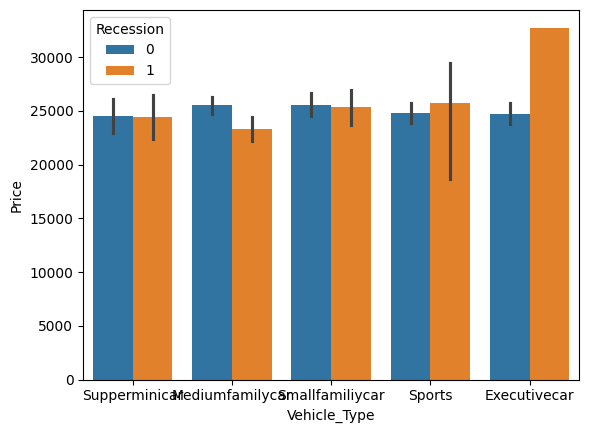

In [31]:
sns.barplot(df, x="Vehicle_Type", y= 'Price', hue='Recession')

la mévente de l'Executivecar et la réduction des vente des voiture de sport pendant la période de récession  est dù a leurs prix trés élévé 

# Crearion de visualization


### Tracage de la fluctation du nombre de vente de automobile en fonction des années 


ValueError: too many values to unpack (expected 2)

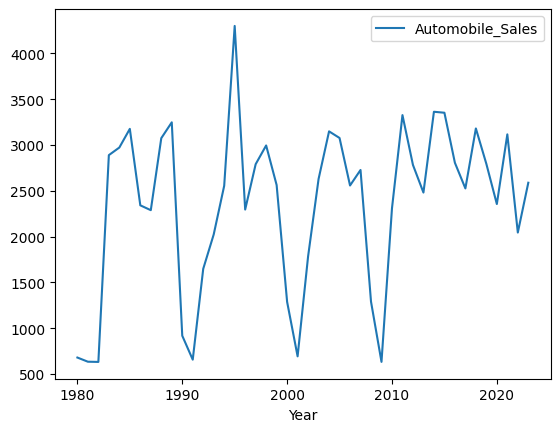

In [13]:
data_year=df.groupby("Year")["Automobile_Sales"].mean().reset_index()
data_year.plot(kind="line",x="Year", y="Automobile_Sales")
for x,y in list(data_year["Year"]), list(data_year["Automobile_Sales"]):
    plt.plot(x,y, c="red", marker="+", labels="Recession")
plt.title("Automobile Sales Flutuation")
plt.xticks(list(range(1980,2024)), rotation = 80)
plt.text(1982, 550, '1981-82 Recession')
plt.text(2020,650, "2020:February-April Recession")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")

<details><summary>Click here for a solution template</summary>

```python
    #create data for plotting
    df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
    plt.figure(figsize=(10, 6))
    df_line.plot(kind = 'line')
    plt.xlabel('........')
    plt.ylabel('.........')
    plt.title('......................')
    plt.show()
```
</details>


### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession 
<br>annotation for at least two years of recession
<br>Title as Automobile Sales during Recession
<br> 


<details><summary>Click here for a hint</summary>
    <p>
    You can create the list for the range 1980 till 2023 and pass that list to the plt.xticks function or you can directly pass the range to the function.
    You might need to rotate the ticks to an angle so that they fit in well on the axis
    You can include annotation with plt.text(x, y, 'text to display') 
    </p>
</details>


<details>
    <summary>Click here for Solution template</summary>

```python
    plt.figure(figsize=(10, 6))
    df_line = ...............
    df_line.plot(kind = 'line')
    plt.xticks(list(range(1980,2024)), rotation = 75)
    plt.xlabel('..............')
    plt.ylabel('............')
    plt.title('...................')
    plt.text(1982, 650, '1981-82 Recession')
    plt.text(......, ..., '..............')
    plt.legend()
    plt.show()
```

</details>


<span style="color:red">
Save this plot as "Line_Plot_1.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


<details><summary>Click here for a hint</summary>

<p>
    You will require:-
    <br>create a separate dataframe where the column recession has a value of '1'
    <br>to group the year, vehicle_type and calculate the average on the 'Automobile Sales'
    <br>one way is to -
    <br>use as_index as false else you will endup with multiple-indexed datafame
    <br>later set year as index and groupby vehicle over Sales and plot
    <br>make use of .plot() with kind = 'line'
    <br>do not forget to include labels and title
</p>
</details>


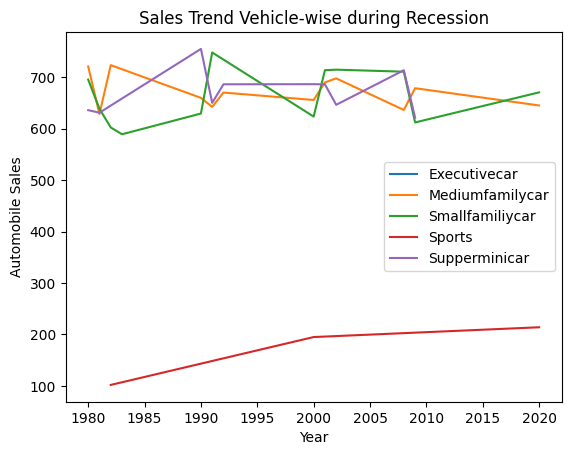

In [9]:
df_rec = df[df['Recession']==1]
df_Mline = df_rec.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()


In [10]:
df_Mline.head()

Year
1980    720.625000
1980    695.233333
1980    635.840000
1981    628.400000
1981    638.420000
1981    630.900000
1982    723.271429
1982    602.225000
1982    102.000000
1983    589.000000
1990    659.733333
1990    629.257143
1990    754.800000
1991    564.000000
1991    642.140000
1991    650.050000
1992    686.100000
2000    195.000000
2020    214.000000
Name: Automobile_Sales, dtype: float64

<details>
    <summary>Click here for Solution template</summary>

```python
    df_rec = df[df['Recession']==1]
    df_Mline = df_rec.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
    df_Mline.set_index('Year', inplace=True)
    df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
    df_Mline.plot(kind='line')
    plt.xlabel('..............')
    plt.ylabel('............')
    plt.title('Sales Trend Vehicle-wise during Recession')
    plt.legend()
    plt.show()

```
</details>


#### From the above plot, what insights have you gained on the sales of various vehicle types?<br> Type in your answer below:


<details>
    <summary>Inference</summary>
<p>
Inference:
From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.<br>while sales of the superminicar and smallfamilycar increased.<br><br>
    </p>
    </details>


<span style="color:red">
Save this plot as "Line_Plot_2.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


<details><summary>Click here for a hint</summary>

<p>
     To visualize the average number of vehicles sold during recession and non-recession periods, you can use a bar chart
        <br> You will need to group recession average Automobile_Sales and then plot it<br>
    Make use of sns.barplot(x=x,y=y, data = df)</p>
</details>


<Axes: xlabel='Vehicle_Type', ylabel='Automobile_Sales'>

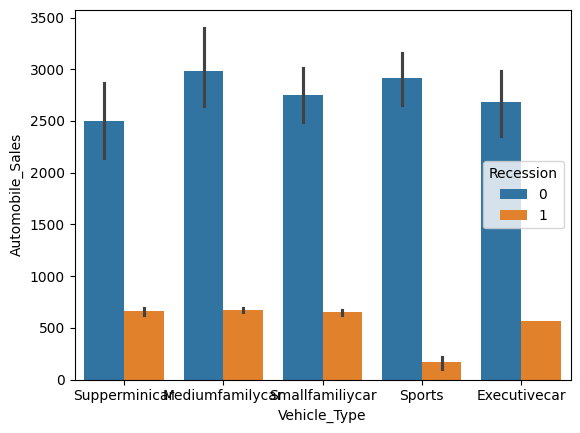

In [11]:
sns.barplot(data=df, x="Vehicle_Type", y="Automobile_Sales", hue="Recession")

In [12]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

<details>
    <summary>Click here for Solution template</summary>

```python
    new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

    # Create the bar chart using seaborn
    plt.figure(figsize=(.........., ............)
    sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
    plt.xlabel('............')
    plt.ylabel('...............')
    plt.title('Average Automobile Sales during Recession and Non-Recession')
    plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
    plt.show()
```

</details>


### Now you want to compare the sales of different vehicle types during a recession and a non-recession period
<br>We recommend that you use the functionality of **Seaborn Library** to create this visualization


<details><summary>Click here for a hint</summary>

<p>
     To visualize sales of different vehicles during recession and non-recession periods, you can use a bar chart
        <br> You will need to group Recession, Vehicle_Type for average Automobile_Sales and then plot it<br>
    Make use of sns.barplot(x=x,y=y, data = df)</p>
</details>


<Axes: xlabel='Vehicle_Type', ylabel='Price'>

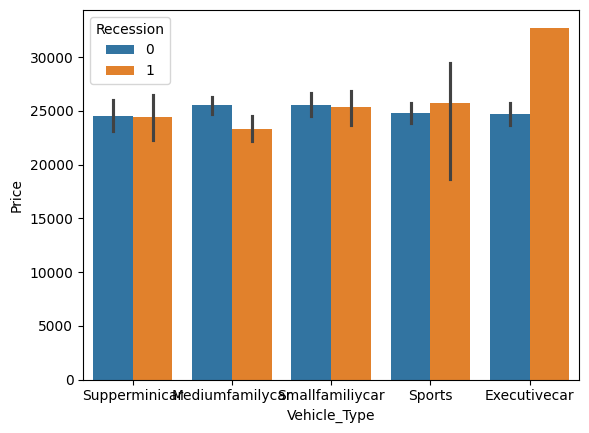

In [13]:
sns.barplot(data=df, x="Vehicle_Type", y="Price", hue="Recession")

<details>
<summary>Click here for Solution template</summary>

```python
   # Filter the data for recessionary periods
    recession_data = df[df['Recession'] == 1]

    dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

    # Calculate the total sales volume by vehicle type during recessions
    #sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

    # Create the grouped bar chart using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='......', y='........', hue='Vehicle_Type', data=dd)
    plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
    plt.xlabel('.............')
    plt.ylabel('..............')
    plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

    plt.show()

```
</details>


### From the above chart what insights have you gained on the overall sales of automobiles during recession? <br> Type your answer below:-


<details>
<summary>Inference</summary>

From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.<br>However, the most affected type of vehicle is executivecar and sports<br><br>
</details>


<span style="color:red">
Save this plot as "Bar_Chart.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


In [14]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

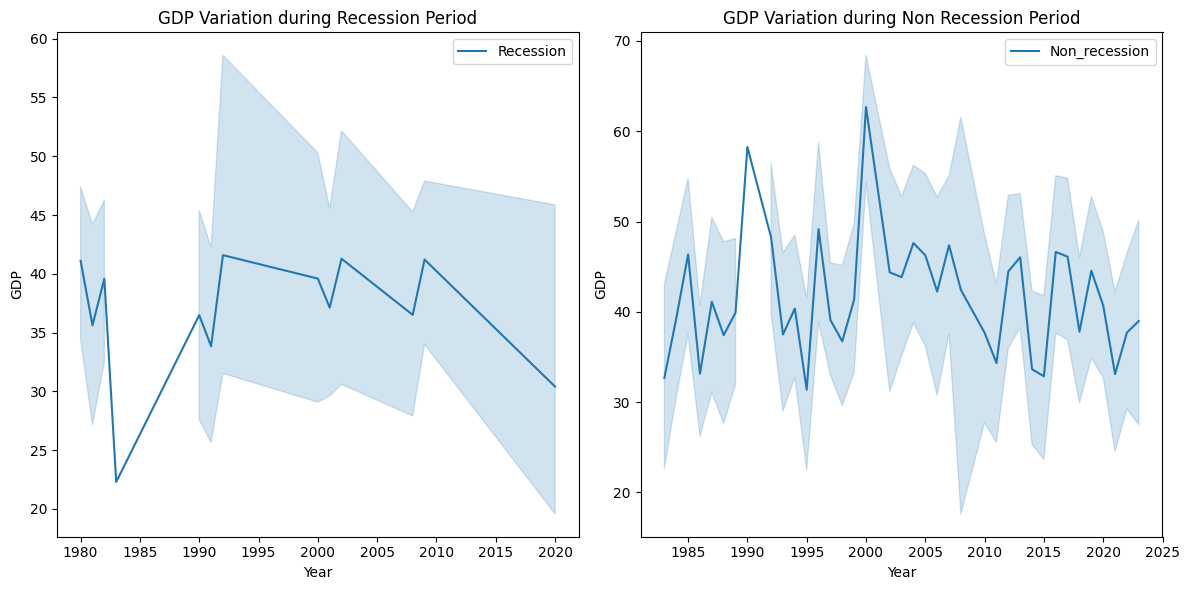

In [15]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1 ,2 ,2 ) # add subplot 2 (1 row, 2 columns, second plot). 

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non_recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non Recession Period')

plt.tight_layout()
plt.show()

<details>
<summary>Click here for Solution template</summary>

```python
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    non_rec_data = df[df['Recession'] == 0]
    
    #Figure
    fig=plt.figure(figsize=(12, 6))
    
    #Create different axes for subploting
    ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
    ax1 = fig.add_subplot(1 ,2 ,2 ) # add subplot 2 (1 row, 2 columns, second plot). 
    
    #plt.subplot(1, 2, 1)
    sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
    ax0.set_xlabel('Year')
    ax0.set_ylabel('GDP')
    ax0.set_title('GDP Variation during Recession Period')
    
    #plt.subplot(1, 2, 2)
    sns.lineplot(x='Year', y='GPD', data=non_rec_data, label='Non_recession',ax=ax1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GPD')
    ax1.set_title('GDP Variation during Non Recession Period')
    
    plt.tight_layout()
    plt.show()

   #------------------------------------------------Alternatively--------------
   #Using subplot()
    plt.figure(figsize=(............, ..........))
    
    #subplot 1
    plt.subplot(1, 2, 1)
    sns.lineplot(x='.........', y='......', data=.........., label='......')
    plt.xlabel('.......')
    plt.ylabel('..........')
    plt.legend()
    #subplot 1
    plt.subplot(1, 2, 2)
    sns.lineplot(x='.........', y='......', data=.........., label='......')
    plt.xlabel('.......')
    plt.ylabel('..........')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
```
</details>


### Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company<br><br>
<span style="color:red">
Save this plot as "Subplot.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


<details><summary>Click here for a hint</summary>

<p>
     You can create Bubble Chart by calling the scatter()
        <br>Pass the 'Month' and 'Automobile_Sales' to the functions as x and y and then use Seasonality weight for size parameter</p>
</details>


In [16]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [17]:
non_rec_data.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
113,2/28/1983,1983,Feb,0,126.06,0.75,15201.649,4621,4,12.819,-1.119666,2.4,3799.1,Sports,Georgia
114,3/31/1983,1983,Mar,0,92.67,1.50,18359.070,3038,8,12.945,0.009733,1.5,3533.5,Smallfamiliycar,California
115,4/30/1983,1983,Apr,0,96.39,1.00,25984.306,4490,8,25.206,0.486432,2.0,3240.4,Supperminicar,Illinois
116,5/31/1983,1983,May,0,91.81,1.50,28692.333,4677,8,14.630,-0.722898,2.3,908.1,Smallfamiliycar,California
117,6/30/1983,1983,Jun,0,106.16,0.75,25856.841,2118,5,18.765,0.220357,2.3,4769.8,Mediumfamilycar,Illinois


Text(0.5, 1.0, 'Seasonality impact on Automobile Sales')

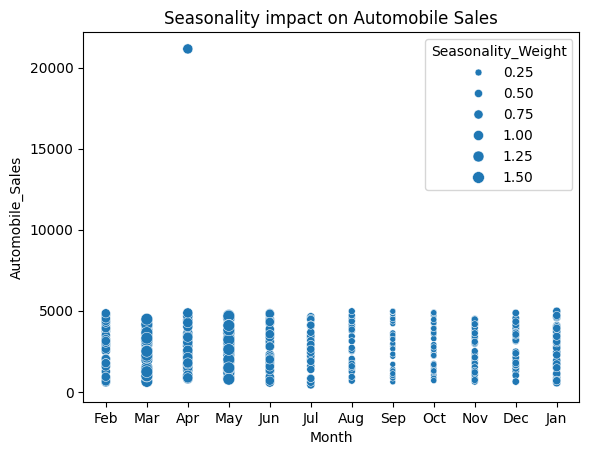

In [18]:
sns.scatterplot(data=non_rec_data, x="Month", y="Automobile_Sales", size="Seasonality_Weight")
plt.title("Seasonality impact on Automobile Sales")

<details>
<summary>Click here for Solution template</summary>

```python
    non_rec_data = df[df['Recession'] == 0]
    
    size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
    sns.scatterplot(data=non_rec_data, x='........', y='........', size=size)
    
    #you can further include hue='Seasonality_Weight', legend=False)

    plt.xlabel('Month')
    plt.ylabel('Automobile_Sales')
    plt.title('Seasonality impact on Automobile Sales')

    plt.show()

```
</details>


### Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April<br><br>
<span style="color:red">
Save this plot as "Bubble.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


<details><summary>Click here for a hint</summary>

<p>
     You can create dataframe where recession is '1'.
        <br>Pass the 'Consumer_Confidence' and 'Automobile_Sales' to the plt.scatter()</p>
</details>


<details>
<summary>Click here for Solution template</summary>

```python
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
    plt.xlabel('.....')
    plt.ylabel('.......')
    plt.title('..........')
    plt.show()

```
</details>



 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


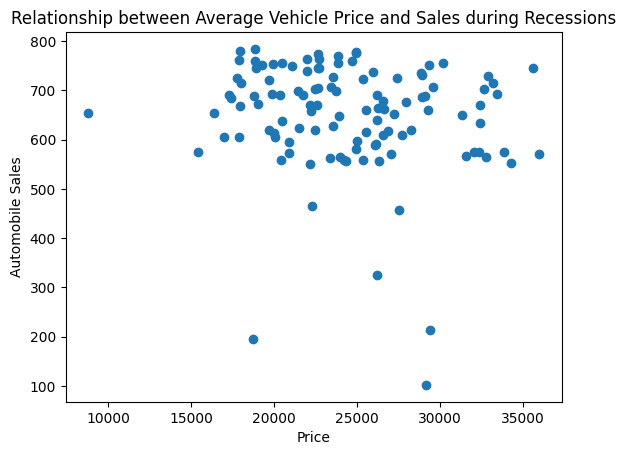

In [19]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title("Relationship between Average Vehicle Price and Sales during Recessions")
plt.show()

<details>
<summary>Click here for Solution template</summary>

```python
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
    
    plt.xlabel('.....')
    plt.ylabel('.......')
    plt.title('..........')
    plt.show()

```
</details>


### Inference
There is not much relation!<br><br>
<span style="color:red">
Save this plot as "Scatter.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


----


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


<details><summary>Click here for a hint</summary>

<p>
     You can create two dataframe for recession and nonreccession period.
    <br> Calculate the sum of Advertising_Expenditure for both dataframes
    <br> Pass these total values to plt.pie(). May include labels as ['Recession', 'Non-Recession']
        <br>Feel Free to customie the pie further
    <br>title this plot as  - Advertising Expenditure during Recession and Non-Recession Periods</p>
</details>


In [20]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [21]:
xy_data=df[df["Vehicle_Type"]=="XYZAutomotives"]
xy_data

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City


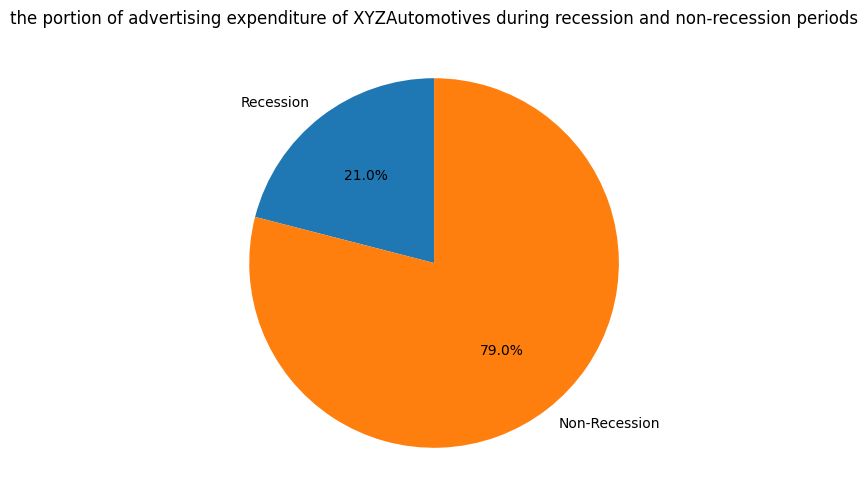

In [22]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]
# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()
# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods')
plt.show()

<details>
<summary>Click here for Solution template</summary>

```python
    # Filter the data 
    Rdata = df[df['Recession'] == 1]
    NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
    RAtotal = Rdata['...........'].sum()
    NRAtotal = NRdata['...........'].sum()

    # Create a pie chart for the advertising expenditure 
    plt.figure(figsize=(8, 6))

    labels = ['Recession', 'Non-Recession']
    sizes = [RAtotal, NRtotal]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('...........................')

    plt.show()


```
</details>


#### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?<br> Type your answer below:-


<details><summary>Inference</summary>
It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!<br><br></details>


<span style="color:red">
Save this plot as "Pie_1.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


In [23]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


<details><summary>Click here for a hint</summary>

<p>
     You will be required to group vehicle type for sum of advertisement expenditure.
    <br> the plot a pie with the data, May include relevant labels
    <br>title this plot as  - Share of Each Vehicle Type in Total Expenditure during Recessions</p>
</details>


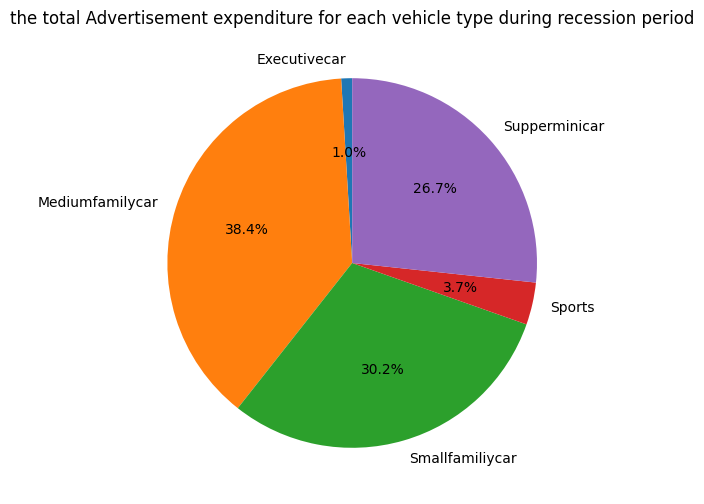

In [24]:
ex=df[df["Recession"]==1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
plt.figure(figsize=(8, 6))
plt.pie(ex.values, labels=ex.index, autopct='%1.1f%%', startangle=90)
plt.title('the total Advertisement expenditure for each vehicle type during recession period')
plt.show()

<details>
    <summary>Click here for Solution template</summary>

```python
    # Filter the data 
    Rdata = df[df['Recession'] == 1]

    # Calculate the sales volume by vehicle type during recessions
    VTexpenditure = Rdata.groupby('..........')['.............'].sum()

    # Create a pie chart for the share of each vehicle type in total expenditure during recessions
    plt.figure(figsize=(..., ...))

    labels = VTexpenditure.index
    sizes = VTexpenditure.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('....................')

    plt.show()
```
    </details>


### Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!<br><br>
<span style="color:red">
Save this plot as "Pie_2.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


----


 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


<details><summary>Click here for a hint</summary>

<p>
    Filter out the data for recession period<br>
     Make use of lineplot() from seaborn and pass the relavent data</p>
</details>


C:\Users\T490s Ha\AppData\Local\Temp\ipykernel_14576\3500657687.py:1: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales',


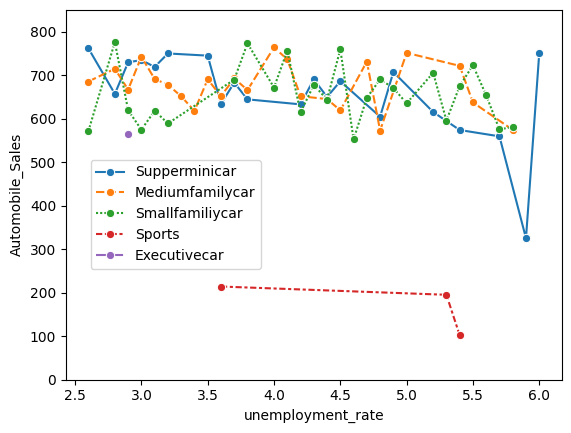

In [25]:
sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

<details>
    <summary>Click here for Solution template</summary>

```python
df_rec = df[df['Recession']==1]
```
sns.lineplot(data=df_rec, x='..........', y='.........',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

</details>


#### From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?<br> Type your answer below:-


<details><summary>Inference</summary>
During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar<br><br>
</details>


<span style="color:red">
Save this plot as "line_plot_3.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyopide (from versions: none)
ERROR: No matching distribution found for pyopide


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

ModuleNotFoundError: No module named 'pyodide'

#### You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth


<details><summary>Click for Solution</summary>
    
```python

    # Filter the data for the recession period and specific cities
    recession_data = data[data['Recession'] == 1]

    # Calculate the total sales by city
    sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
    map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
    choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
    map1

```
</details>


# Congratulations! You have completed the lab


## Authors


[Dr. Pooja](author_link)


``` toggle ## Change Log
```


<!---|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
2024-01-05|0.2.1|Sowmyaa Gurusamy|Updated the lab instructions|
|2023-06-17|0.2|Pooja|Initial Lab Creation|
|2023-05-01|0.1|Shengkai|Create Lab Template|-->


Copyright © 2023 IBM Corporation. All rights reserved.
